In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("diabetic_data.csv")


In [3]:
df.shape


(101766, 50)

In [4]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
import numpy as np

df.replace("?", np.nan, inplace=True)

In [8]:
df.isnull().sum().sort_values(ascending=False).head(10)

weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
dtype: int64

In [9]:
df.drop(
    columns=[
        'weight',
        'max_glu_serum',
        'A1Cresult',
        'medical_specialty',
        'payer_code'
    ],
    inplace=True
)


In [10]:
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)


In [11]:
df['readmitted'] = df['readmitted'].apply(
    lambda x: 1 if x == '<30' else 0
)


In [12]:
age_map = {
    '[0-10)':5,'[10-20)':15,'[20-30)':25,'[30-40)':35,
    '[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,
    '[80-90)':85,'[90-100)':95
}

df['age'] = df['age'].map(age_map)


In [13]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [15]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



In [16]:
df.isnull().sum().max()


0

In [17]:
df.shape


(101766, 43)

In [19]:
df['readmitted'].value_counts(normalize=True)


readmitted
0    0.888401
1    0.111599
Name: proportion, dtype: float64

“The dataset shows class imbalance, with approximately 11% of patients being readmitted within 30 days. This reflects real-world healthcare data where readmission events are relatively rare.”

Matplotlib is building the font cache; this may take a moment.


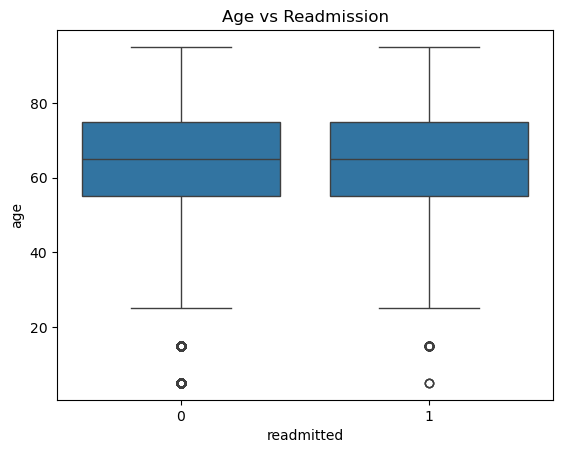

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='readmitted', y='age', data=df)
plt.title("Age vs Readmission")
plt.show()


### Age vs Readmission Insight

- Readmitted patients tend to be slightly older compared to non-readmitted patients.
- Older age groups show a higher risk of hospital readmission.
- This suggests age is an important factor in readmission risk analysis.


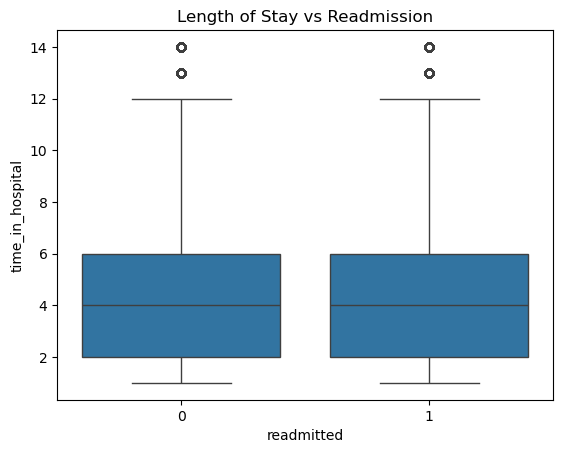

In [21]:
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title("Length of Stay vs Readmission")
plt.show()


### Length of Stay vs Readmission Insight

- Patients who are readmitted tend to have slightly longer hospital stays.
- Longer hospitalization may indicate higher illness severity or complications.
- Length of stay is an important factor contributing to readmission risk.


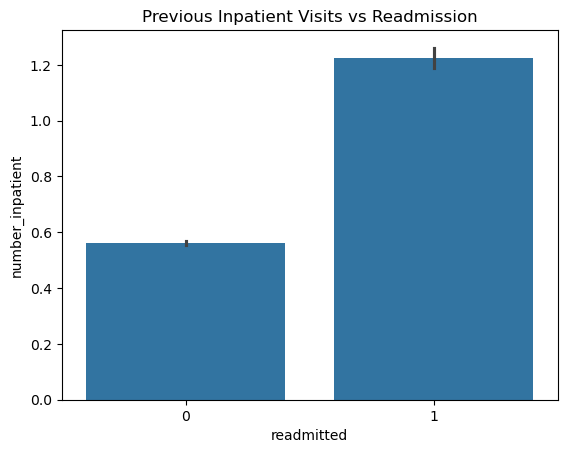

In [22]:
sns.barplot(x='readmitted', y='number_inpatient', data=df)
plt.title("Previous Inpatient Visits vs Readmission")
plt.show()


### Prior Inpatient Visits Insight

- Patients with previous inpatient visits have a significantly higher risk of readmission.
- Prior hospitalization history is a strong indicator of readmission risk.


In [23]:
df['total_visits'] = (
    df['number_inpatient'] +
    df['number_emergency'] +
    df['number_outpatient']
)


In [24]:
df[['number_inpatient', 'number_emergency', 'number_outpatient', 'total_visits']].head()


,number_inpatient,number_emergency,number_outpatient,total_visits
0,0,0,0,0
1,0,0,0,0
2,1,0,2,3
3,0,0,0,0
4,0,0,0,0


### Feature Engineering: Total Visits

- A new feature `total_visits` was created by combining inpatient, emergency, and outpatient visits.
- This feature captures overall patient interaction with the healthcare system.
- Higher total visits may indicate chronic conditions and increased readmission risk.


In [25]:
features = [
    'age',
    'time_in_hospital',
    'num_lab_procedures',
    'num_medications',
    'total_visits'
]

X = df[features]
y = df['readmitted']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
y_pred = model.predict(X_test)


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)


array([[18040,    29],
       [ 2278,     7]])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.19      0.00      0.01      2285

    accuracy                           0.89     20354
   macro avg       0.54      0.50      0.47     20354
weighted avg       0.81      0.89      0.84     20354



### Model Performance Analysis

- The model performs well in identifying non-readmitted patients but struggles to detect readmitted cases.
- This behavior is expected due to significant class imbalance in the dataset.
- Accuracy is not a reliable metric in this case; recall for high-risk patients is more important.
- The model serves as a baseline for predictive healthcare analytics.


In [31]:
model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
model_balanced.fit(X_train, y_train)

y_pred_bal = model_balanced.predict(X_test)
print(classification_report(y_test, y_pred_bal))


              precision    recall  f1-score   support

           0       0.91      0.69      0.79     18069
           1       0.16      0.47      0.24      2285

    accuracy                           0.66     20354
   macro avg       0.54      0.58      0.51     20354
weighted avg       0.83      0.66      0.72     20354



### Improved Model with Class Balancing

- Class imbalance was addressed using class-weighted logistic regression.
- Recall for readmitted patients improved significantly, allowing better identification of high-risk cases.
- Although overall accuracy decreased, the model became more suitable for healthcare risk analysis.
- This trade-off is acceptable as identifying high-risk patients is more critical than overall accuracy.


In [32]:
df['readmission_risk_prob'] = model_balanced.predict_proba(X)[:, 1]


In [33]:
df['risk_level'] = pd.cut(
    df['readmission_risk_prob'],
    bins=[0, 0.4, 0.7, 1],
    labels=['Low', 'Medium', 'High']
)


In [34]:
df[['readmission_risk_prob', 'risk_level']].head()


,readmission_risk_prob,risk_level
0,0.315958,Low
1,0.369558,Low
2,0.469719,Medium
3,0.380471,Low
4,0.375754,Low
